In [2]:
% matplotlib inline

In [111]:
#imports

import numpy as np
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import Quandl


In [86]:
data = Quandl.get("FAA/UNRULY")

print("\nFirst 5 values from the data:")
print(data.head())

print("\nLast 10 values from the data:")
print(data.tail(10))

print("\nValues from index 10 to index 14:")
print(data[10:15])


First 5 values from the data:
            Total
Year             
1995-12-31    146
1996-12-31    184
1997-12-31    237
1998-12-31    204
1999-12-31    226

Last 10 values from the data:
            Total
Year             
2006-12-31    137
2007-12-31    153
2008-12-31    124
2009-12-31    139
2010-12-31    128
2011-12-31    155
2012-12-31    183
2013-12-31    149
2014-12-31    143
2015-12-31     31

Values from index 10 to index 14:
            Total
Year             
2005-12-31    205
2006-12-31    137
2007-12-31    153
2008-12-31    124
2009-12-31    139


In [58]:
print("\nStatistics:")
print(data.describe())

print("\nInfo about the dataset:")
data.info()

print("\nType of each column:")
data.dtypes


First 5 values from the data:
            Total
Year             
1995-12-31    146
1996-12-31    184
1997-12-31    237
1998-12-31    204
1999-12-31    226

Last 10 values from the data:
            Total
Year             
2006-12-31    137
2007-12-31    153
2008-12-31    124
2009-12-31    139
2010-12-31    128
2011-12-31    155
2012-12-31    183
2013-12-31    149
2014-12-31    143
2015-12-31     31

Statistics:
            Total
count   21.000000
mean   189.476190
std     70.817808
min     31.000000
25%    143.000000
50%    183.000000
75%    237.000000
max    310.000000

Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 1995-12-31 to 2015-12-31
Data columns (total 1 columns):
Total    21 non-null float64
dtypes: float64(1)
memory usage: 336.0 bytes

Type of each column:


Total    float64
dtype: object

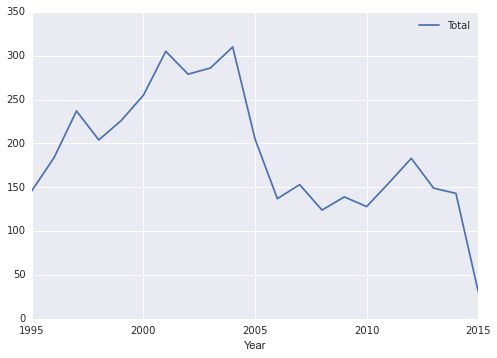

In [55]:
data.plot()


(array([ 1.,  0.,  0.,  4.,  5.,  2.,  3.,  1.,  2.,  3.]),
 array([  31. ,   58.9,   86.8,  114.7,  142.6,  170.5,  198.4,  226.3,
         254.2,  282.1,  310. ]),
 <a list of 10 Patch objects>)

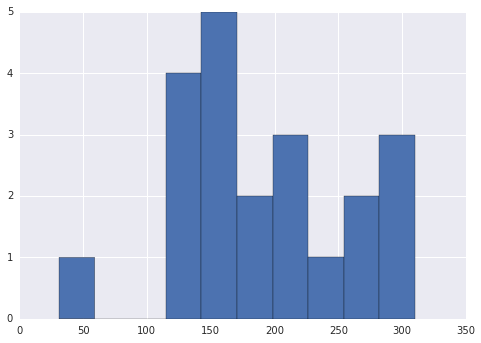

In [47]:
plt.hist(data["Total"])


In [66]:
# filter some data

fd = data[data.Total > 100]

fd.count()

Total    20
dtype: int64

In [143]:
# apply linear regrassion

reg = linear_model.LinearRegression()

# split data
fd = fd.iloc[np.random.permutation(len(fd))]
test = fd[:5]
train = fd[5:]

# convert to numpy to use with sklearn
xVals = train.Total.values
yVals = pd.to_numeric(train.index.values)

# change shape
x_train = xVals.reshape(15, 1)
y_train = yVals.reshape(15, 1)

# trainig data
print(x_train)
print("\n")
print(y_train)

# train
reg.fit(x_train, y_train)

[[ 286.]
 [ 184.]
 [ 205.]
 [ 255.]
 [ 124.]
 [ 155.]
 [ 143.]
 [ 305.]
 [ 146.]
 [ 183.]
 [ 128.]
 [ 153.]
 [ 137.]
 [ 237.]
 [ 139.]]


[[1072828800000000000]
 [ 851990400000000000]
 [1135987200000000000]
 [ 978220800000000000]
 [1230681600000000000]
 [1325289600000000000]
 [1419984000000000000]
 [1009756800000000000]
 [ 820368000000000000]
 [1356912000000000000]
 [1293753600000000000]
 [1199059200000000000]
 [1167523200000000000]
 [ 883526400000000000]
 [1262217600000000000]]


D:\Programming\anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [144]:
xVals_test = test.Total.values
yVals_test = pd.to_numeric(test.index.values)
x_test = xVals_test.reshape(5, 1)
y_test = yVals_test.reshape(5, 1)

# test data
print(x_test)
print("\n")
print(y_test)

# test
reg.score(x_test, y_test)

[[ 226.]
 [ 310.]
 [ 204.]
 [ 149.]
 [ 279.]]


[[ 946598400000000000]
 [1104451200000000000]
 [ 915062400000000000]
 [1388448000000000000]
 [1041292800000000000]]


0.15622557563649886

D:\Programming\anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  self.set_edgecolor(c)


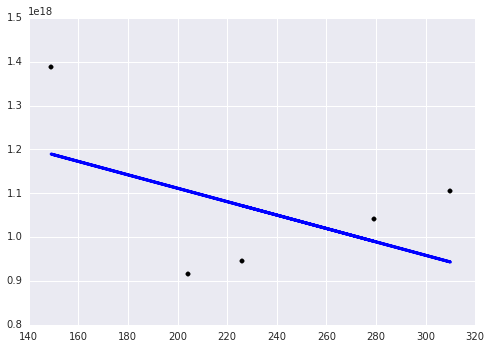

In [148]:
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, reg.predict(x_test), color='blue', linewidth=3)
